# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [2]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [3]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [4]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: The number of observations vary depending on the variable (400 for 'admit'; 398 for 'gre'; 398 for 'gpa'; 399 for 'prestige').

#### Question 2. Create a summary table

In [5]:
#function to create a summary table is .describe()

df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: A low standard deviation indicates that the data points tend to be close to the mean of the set, while a high standard deviation indicates that the data points are spread out over a wider range of values. By this logic, the data points for the variable GRE are more spread out than those of GPA. This appears to be the case in that there is a greater magnitude of difference between the min and max of GRE than GPA.

#### Question 4. Drop data points with missing data


First you have to identify which observations have missing data by using the function .isnull(). All the missing data points will return "True".

In [21]:
df_raw.isnull()

,admit,gre,gpa,prestige
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


In [22]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


In [23]:
df_raw.dropna()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
5,1,760.0,3.00,2.0
6,1,560.0,2.98,1.0
7,0,400.0,3.08,2.0
8,1,540.0,3.39,3.0
9,0,700.0,3.92,2.0


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: Using the function .dropna(), the dataframe now returns 397 rows instead of 400 rows, which means the two variables with two missing data points appear to have been dropped. 

#### Question 6. Create box plots for GRE and GPA

In [24]:
import matplotlib.pyplot as plt

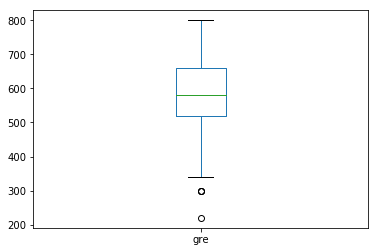

In [34]:
#boxplot 1 

df_raw.gre.plot(kind='box')

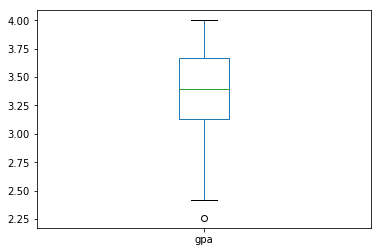

In [35]:
#boxplot 2 

df_raw.gpa.plot(kind='box')

#### Question 7. What do this plots show?

Answer: GRE data appears to have more of a normal distribution than GPA data. GPA data appears to skew to the left.

#### Question 8. Describe each distribution 

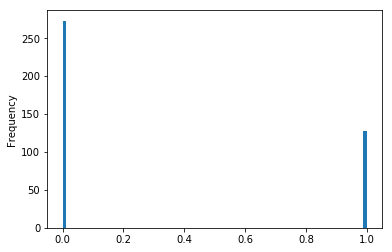

In [45]:
# plot the distribution of each variable. This is the one for 'admit'.

df_raw.admit.plot(kind='hist', stacked=True, bins=80)


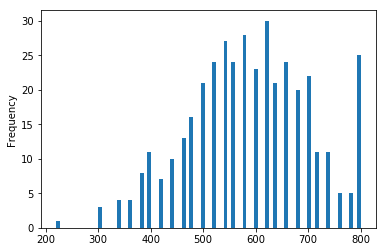

In [49]:
# This is the one for 'gre'.

df_raw.gre.plot(kind='hist', stacked=True, bins=80)

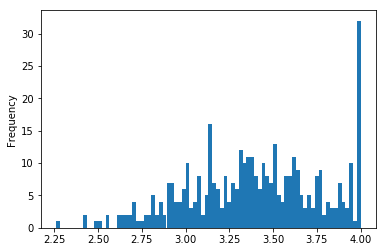

In [51]:
# This is the one for 'gpa'.

df_raw.gpa.plot(kind='hist', stacked=True, bins=80)

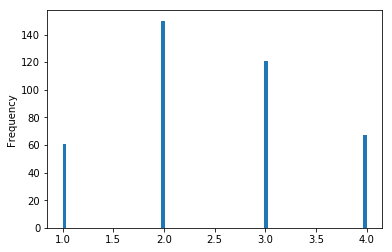

In [52]:
# This is the one for 'prestige'.

df_raw.prestige.plot(kind='hist', stacked=True, bins=80)

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: No, none of the variables appear to follow a normal distibution, except for prestige. Admit only has two values (0 or 1). Both GRE and GPA have outliers that skew the data negatively.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: Yes, there are outliers that make the data not normally distributed. You can correct for this by identifying another distribution the data may fit (e.g. Poisson; binomial) and use techniques for analyzing this kind of distribution. Or you can transform the data so it fits more of a normal distribution. There is a technique called "Box Cox" that can do this.

#### Question 11. Which of our variables are potentially colinear? 

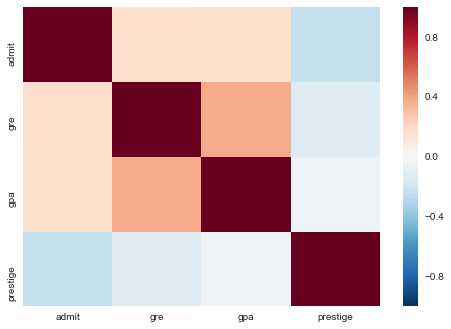

In [67]:
import seaborn as sns
corr = df_raw.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

#### Question 12. What did you find?

Answer: The darkest colors (closest to 1) represent a near perfect 1:1 positive correlation between the variables. Naturally, this relationship exists between a variable and itself (e.g. GPA in relation to GPA). The colors in light blue (close to zero) do not seem to have a relations (e.g. prestige and GPA). There's a positive correlation between GRE and GPA and to a lesser extent, GPA and admission and GRE and admission. There's a negative correlation between prestige and admission and to a lesser extend GRE and prestige. 

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: According to the correlation matrix, there is a slight negative correlation between the prestige of an undergrad school and grad school admissions. That is, if the school is prestigious, the student has less of a chance of being admitted. This seems counter-intuitive. We should determine how prestige is defined as it is a rather subjective kind of label. If there is a rigorous method of identifying prestige, then we can run a regression on prestige and GPA to see if the null hypothesis (that there is no relationship between the two) can be rejected and if the effect is statistically significant.

#### Question 14. What is your hypothesis? 

Answer: Since prestige is such a subjective measure, I do not think it has any effect on graduate school admission rates. 

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data